### Goal:
Predict if customer can retire or not based on their features

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [21]:


#import Data into Pandas DataFrame
retire_df = pd.read_csv('../datasets/retirement/Bank_Customer_retirement.csv')


In [22]:
retire_df.shape

(500, 4)

In [23]:
print(retire_df.keys())

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')


In [24]:
retire_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


### Visual Analysis

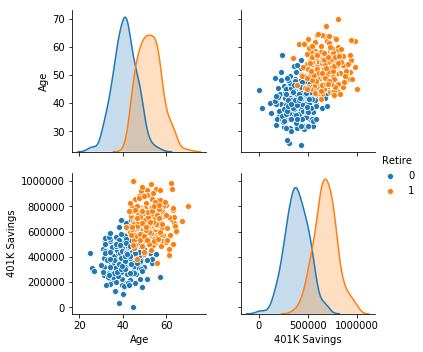

In [25]:

sns.pairplot(retire_df, hue = 'Retire', vars = ['Age', '401K Savings' ])



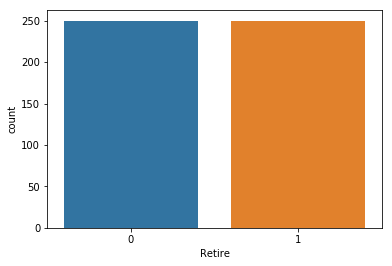

In [26]:

sns.countplot(retire_df['Retire'], label = 'count')

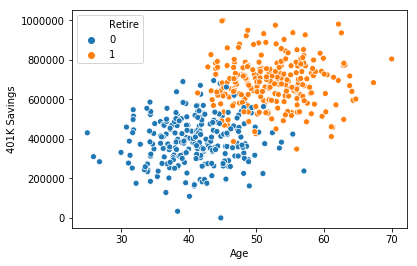

In [28]:

sns.scatterplot(x = 'Age', y = '401K Savings', hue = 'Retire', data = retire_df)

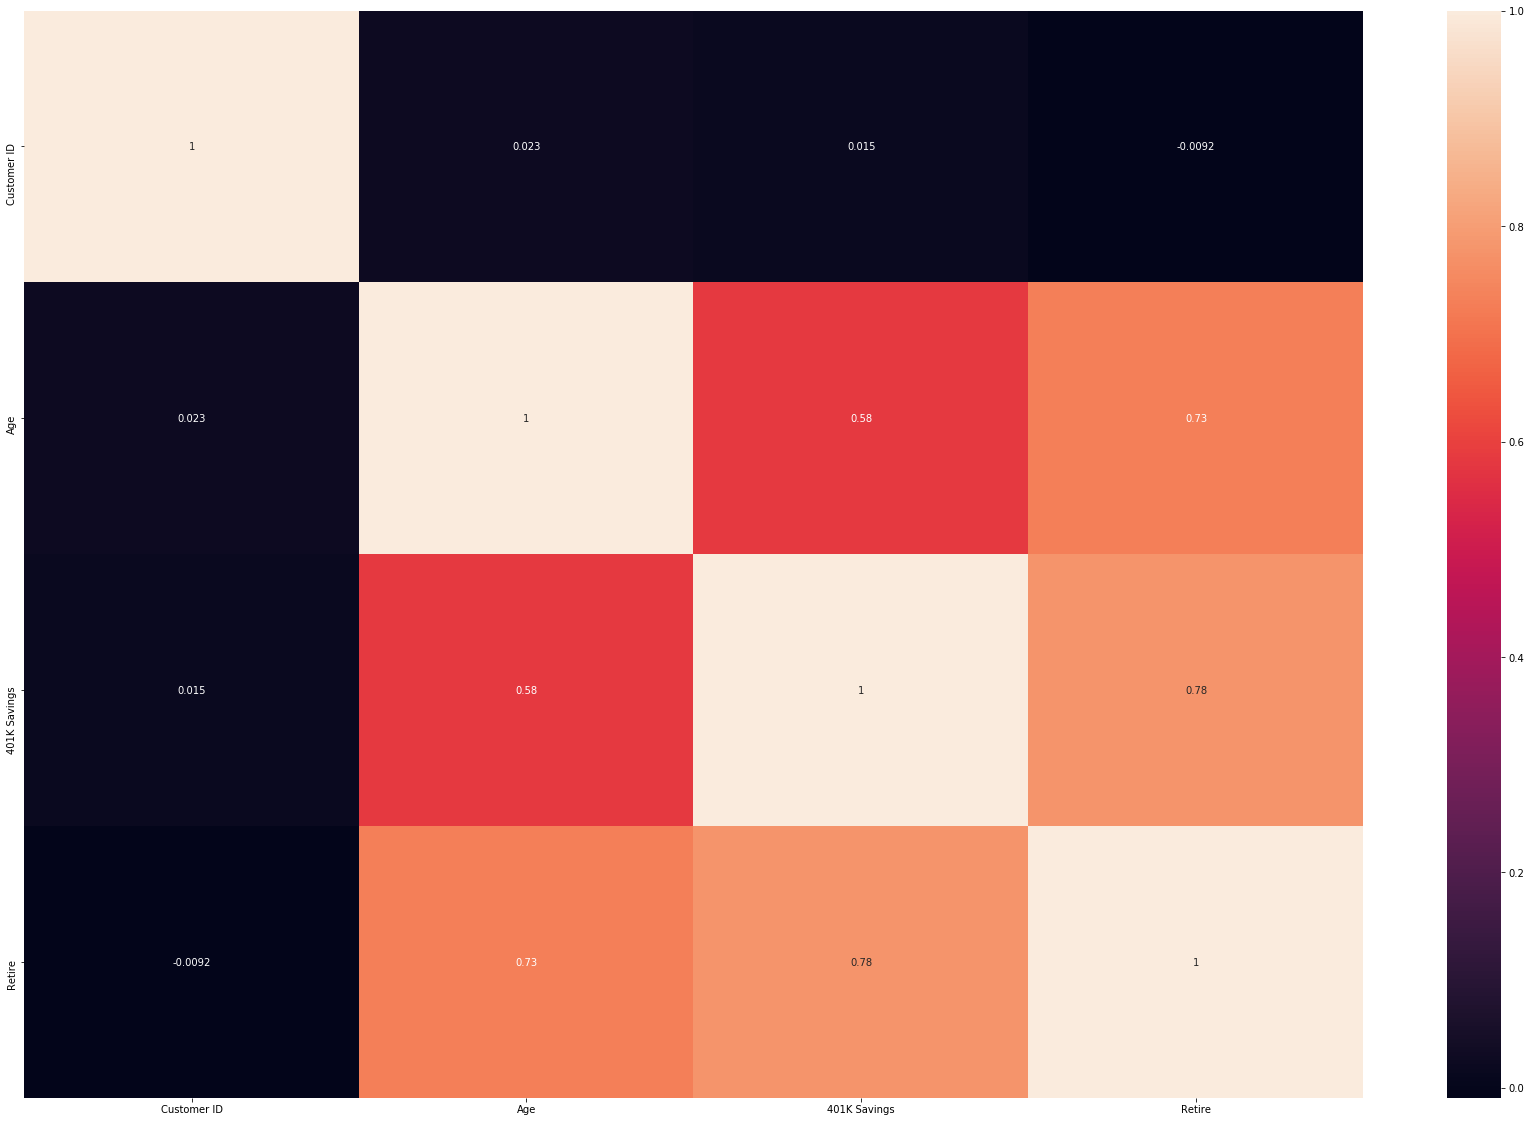

In [29]:
# plot corrilations
plt.figure(figsize =(30,20))

sns.heatmap(retire_df.corr(), annot = True)

### Data Cleaning & Prep

In [38]:
#### Drop Column User ID

In [39]:
retire_df.drop(['Customer ID'], axis = 1, inplace = True)

In [42]:
X = retire_df.drop(['Retire'], axis = 1)

In [43]:

y = retire_df['Retire']

In [44]:
X

,Age,401K Savings
0,39.180417,322349.87400
1,56.101686,768671.57400
2,57.023043,821505.47180
3,43.711358,494187.48500
4,54.728823,691435.77230
5,50.499789,742398.90680
6,39.573302,578650.31560
7,55.159309,533821.20110
8,30.791271,459592.40840
9,40.456073,396800.25090


In [45]:
y

0      0
1      1
2      1
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    1
476    1
477    0
478    0
479    1
480    1
481    1
482    0
483    1
484    1
485    0
486    0
487    0
488    1
489    0
490    1
491    1
492    0
493    1
494    0
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [67]:
min_data = X.min()

In [68]:
min_data

Age             25.0
401K Savings    10.0
dtype: float64

In [69]:
range_retire = (X - min_data).max()

In [70]:
range_retire

Age                 45.0
401K Savings    999990.0
dtype: float64

In [71]:
X_scaled = (X - min_data)/range_retire

In [72]:
X_scaled

,Age,401K Savings
0,0.315120,0.322343
1,0.691149,0.768669
2,0.711623,0.821504
3,0.415808,0.494182
4,0.660641,0.691433
5,0.566662,0.742396
6,0.323851,0.578646
7,0.670207,0.533817
8,0.128695,0.459587
9,0.343468,0.396794


### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size =.2, random_state=0, stratify=y)

In [125]:
X_train.shape

(400, 2)

In [126]:
y_train.shape

(400,)

In [127]:
X_test.shape

(100, 2)

In [128]:
y_test.shape

(100,)

### Train Model

In [129]:
from sklearn.svm import SVC


In [130]:
svc_model = SVC()

In [131]:

svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Evaluate Model:

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
y_predict = svc_model.predict(X_test)

In [134]:
y_predict

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1])

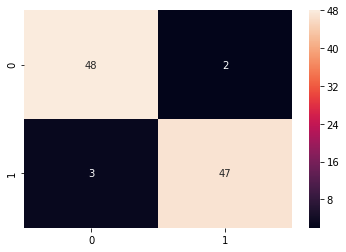

In [135]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [136]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        50
          1       0.96      0.94      0.95        50

avg / total       0.95      0.95      0.95       100



### Param Optimization

In [137]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel': ['rbf']}

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [140]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9477611940298507, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.9696969696969697, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.9621212121212122, total=   0.0s
[CV] kernel=rbf, C=0.1, gamma=0.01 ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  kernel=rbf, C=1, gamma=0.01, score=0.9696969696969697, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV]  kernel=rbf, C=1, gamma=0.001, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV]  kernel=rbf, C=1, gamma=0.001, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=1, gamma=0.001 ....................................
[CV]  kernel=rbf, C=1, gamma=0.001, score=0.9696969696969697, total=   0.0s
[CV] kernel=rbf, C=10, gamma=1 .......................................
[CV]  kernel=rbf, C=10, gamma=1, score=0.9328358208955224, total=   0.0s
[CV] kernel=rbf, C=10, gamma=1 .......................................
[CV]  kernel=rbf, C=10, gamma=1, score=0.9253731343283582, total=   0.0s
[CV] kernel=rbf, C=10, gamma=1 .......................................
[CV]  kernel=rbf, C=10, gamma=1, score=0.9696969696969697, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.1 ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=4)

In [141]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [142]:
grid_predict = grid.predict(X_test)

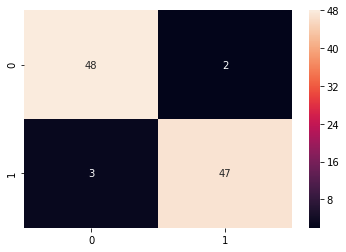

In [143]:
cm = confusion_matrix(y_test,grid_predict)
sns.heatmap(cm, annot = True)

In [144]:
print(classification_report(y_test, grid_predict))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        50
          1       0.96      0.94      0.95        50

avg / total       0.95      0.95      0.95       100



### Shap Values

In [145]:

import shap
# print the JS visualization code to the notebook
shap.initjs()

In [146]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(grid.predict, X_train)
shap_values = explainer.shap_values(X_test)

Using 400 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 100/100 [00:01<00:00, 91.76it/s]


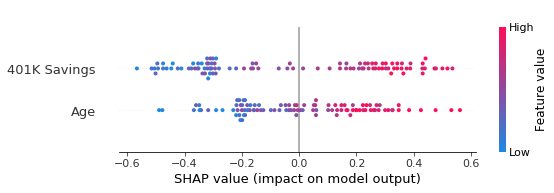

In [147]:
shap.summary_plot(shap_values, X_test)